# 기초 통계
## 필요 라이브러리 import

In [1]:
import pandas as pd
import numpy as np

## 데이터셋 생성

In [2]:
data = pd.DataFrame( {'score1' : [99, 65, 79, 94, 87],
                      'score2' : [79, 85, 79, 93, 97],
                      'score3' : [59, np.nan, 39, np.nan, np.nan],
                      'weight' : [5.43, 0.12, 10.44, 9.33, 4.22],
                      'diff' : [-2.1, 5, 2, -5.4, -3.3],
                      'place' : ['A', 'B', 'A', 'A', 'B']} )

data

,score1,score2,score3,weight,diff,place
0,99,79,59.0,5.43,-2.1,A
1,65,85,NaN,0.12,5.0,B
2,79,79,39.0,10.44,2.0,A
3,94,93,NaN,9.33,-5.4,A
4,87,97,NaN,4.22,-3.3,B


## 기술 통계
### pnadas 함수를 이용한 요약 정보
info() : 컬럼 이름, 결측치를 제외한 값 카운트, 타입 확인

describe() : 데이터 프레임 컬럼별 카운트, 평균, 표준편차, 최소값, 사분위수, 최대값 확인
  - 수치형 변수 요약 정보 : describe()
  - 범주형 변수 요약 정보 : describe(include='object')
  - 전체 변수의 요약 정보 : describe(include='all')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score1  5 non-null      int64  
 1   score2  5 non-null      int64  
 2   score3  2 non-null      float64
 3   weight  5 non-null      float64
 4   diff    5 non-null      float64
 5   place   5 non-null      object 
dtypes: float64(3), int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
data.describe()

,score1,score2,score3,weight,diff
count,5.00000,5.000000,2.000000,5.000000,5.000000
mean,84.80000,86.600000,49.000000,5.908000,-0.760000
std,13.38656,8.173127,14.142136,4.148128,4.200357
min,65.00000,79.000000,39.000000,0.120000,-5.400000
25%,79.00000,79.000000,44.000000,4.220000,-3.300000
50%,87.00000,85.000000,49.000000,5.430000,-2.100000
75%,94.00000,93.000000,54.000000,9.330000,2.000000
max,99.00000,97.000000,59.000000,10.440000,5.000000


In [5]:
data.describe(include='object')

,place
count,5
unique,2
top,A
freq,3


In [7]:
data.describe(include='all')

,score1,score2,score3,weight,diff,place
count,5.00000,5.000000,2.000000,5.000000,5.000000,5
unique,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,A
freq,NaN,NaN,NaN,NaN,NaN,3
mean,84.80000,86.600000,49.000000,5.908000,-0.760000,NaN
std,13.38656,8.173127,14.142136,4.148128,4.200357,NaN
min,65.00000,79.000000,39.000000,0.120000,-5.400000,NaN
25%,79.00000,79.000000,44.000000,4.220000,-3.300000,NaN
50%,87.00000,85.000000,49.000000,5.430000,-2.100000,NaN
75%,94.00000,93.000000,54.000000,9.330000,2.000000,NaN


### 중심경향치 확인
  - mean() : 산술평균
  - trim_mean() : 절사평균
  - np.average(weight=) : 가중평균
  - median() : 중앙값
  - mode() : 최빈수

In [29]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [38]:
# 한 변수의 평균
print(f'한 변수: {data["score1"].mean()}')

# 데이터프레임 전체 평균
print(f'\n전체: \n{data.mean()}')

# 절사평균
from scipy.stats import trim_mean
print(f'\nscore2의 절사평균: {trim_mean(data["score2"], 0.1)}')  # 양쪽 끝에서 10%를 제거한 평균값

# 가중평균
import numpy as np
print(f'\nscore2의 가중평균: {np.average(data["score2"], weights=data["weight"])}')

한 변수: 84.8

전체: 
score1    84.800
score2    86.600
score3    49.000
weight     5.908
diff      -0.760
dtype: float64

score2의 절사평균: 86.6

score2의 가중평균: 86.01760324983074


In [39]:
# 중앙값
## 데이터 개수 : 홀수
print(data['score2'].median())

## 데이터 개수 : 짝수
x = [100, 600, 100, 200, 400, 500]
print(np.median(x))

85.0
300.0


In [40]:
# 최빈값
data['score2'].mode()

0    79
Name: score2, dtype: int64

### 산포도
  - max() - min() : 범위 ( range )
  - var() : 분산(variance)
  - std() : 표준편차 (standard deviation)
  - quantile(0.75) - quantile(0.25) : 사분위수 범위

In [41]:
# 범위
data['score2'].max() - data['score2'].min()

18

In [42]:
# 분산
print(f'score2의 분산 : {data["score2"].var()}')
# 표준편차
print(f'score2의 표준편차 : {data["score2"].std()}')

score2의 분산 : 66.8
score2의 표준편차 : 8.17312669668102


In [44]:
# 사분위수 범위
print(data["score2"].quantile(0.75) - data["score2"].quantile(0.25))

14.0


In [47]:
# 변동 계수
# 표준편차를 평균으로 나눈 값
cv1 = data['score1'].std() / data['score1'].mean()
cv2 = data['score2'].std() / data['score2'].mean()

print(f'score1의 CV계수 : {np.round(cv1, 3)}')
print(f'score2의 CV계수 : {np.round(cv2, 3)}')

score1의 CV계수 : 0.158
score2의 CV계수 : 0.094


### 비대칭도
- skew() : 왜도
- kurtosis() : 첨도

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   # FutureWarning 제거
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name == 'nt':
    font_family = 'Malgun Gothic'

sns.set(font=font_family, rc={'axes.unicode_minus' : False})

In [16]:
# 왜도 산출
from scipy.stats import skew

skew_list1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 4, 5]
skew_list2 = [1, 2, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6]

print(skew(skew_list1))
print(skew(skew_list2))

1.6656293067949786
-1.1156146358524315


In [11]:
import scipy.stats

In [21]:
print(f'왜도가 0이상일 때의 평균 : {np.mean(skew_list1)}')
print(f'왜도가 0이상일 때의 최빈값 : {stats.mode(skew_list1)[0][0]}')
print(f'왜도가 0이상일 때의 중간값 : {np.median(skew_list1)}')
print('왜도가 0이상일 때, 그래프는 우측으로 늘어진 형태를 보인다.')
print('다시 말해 좌측에 값이 몰려있다는 뜻이므로 최빈값이 좌측에 있다는 말이다.')
print('왜도가 0이상일 때, 최빈값 =< 중간값 < 평균')
print('='*60)
print(f'왜도가 0이하일 때의 평균 : {np.mean(skew_list2)}')
print(f'왜도가 0이하일 때의 최빈값 : {stats.mode(skew_list2)[0][0]}')
print(f'왜도가 0이하일 때의 중간값 : {np.median(skew_list2)}')
print('왜도가 0이하일 때, 그래프는 좌측으로 늘어진 형태를 보인다.')
print('다시 말해 우측에 값이 몰려있다는 뜻이므로 최빈값이 우측에 있다는 말이다.')
print('왜도가 0이하일 때, 평균 < 중간값 =< 최빈값')

왜도가 0이상일 때의 평균 : 1.736842105263158
왜도가 0이상일 때의 최빈값 : 1
왜도가 0이상일 때의 중간값 : 1.0
왜도가 0이상일 때, 그래프는 우측으로 늘어진 형태를 보인다.
다시 말해 좌측에 값이 몰려있다는 뜻이므로 최빈값이 좌측에 있다는 말이다.
왜도가 0이상일 때, 최빈값 =< 중간값 < 평균
왜도가 0이하일 때의 평균 : 4.7894736842105265
왜도가 0이하일 때의 최빈값 : 6
왜도가 0이하일 때의 중간값 : 5.0
왜도가 0이하일 때, 그래프는 좌측으로 늘어진 형태를 보인다.
다시 말해 우측에 값이 몰려있다는 뜻이므로 최빈값이 우측에 있다는 말이다.
왜도가 0이하일 때, 평균 < 중간값 =< 최빈값


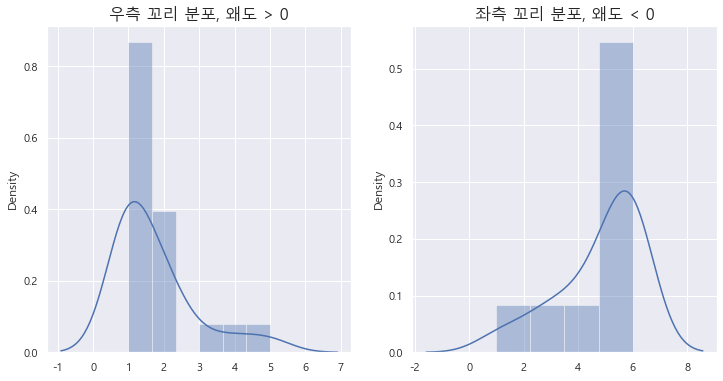

In [18]:
# 왜도 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
dist_plot = sns.distplot(skew_list1)
plt.title('우측 꼬리 분포, 왜도 > 0', fontsize=16)

plt.subplot(1, 2, 2)
dist_plot = sns.distplot(skew_list2)
plt.title('좌측 꼬리 분포, 왜도 < 0', fontsize=16)

plt.show()

In [4]:
# 첨도 산출
from scipy.stats import kurtosis

kur_list1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
kur_list2 = [1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5,
             5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
             5, 6, 7, 8, 9, 10]

print(kurtosis(kur_list1))
print(kurtosis(kur_list2))

-1.2242424242424244
2.351887069895106


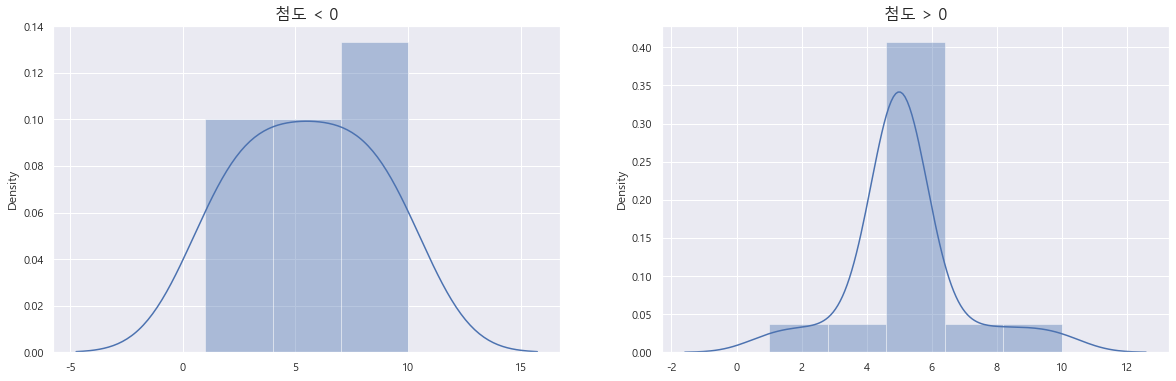

In [5]:
# 첨도 시각화
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
dist_plot = sns.distplot(kur_list1)
plt.title('첨도 < 0', fontsize=16)

plt.subplot(1, 2, 2)
dist_plot = sns.distplot(kur_list2)
plt.title('첨도 > 0', fontsize=16)

plt.show()

In [39]:
np.random.choice(np.arange(20), size=10, replace=True)

array([ 6,  9,  4, 12, 17,  4, 17,  5, 12,  4])

In [54]:
y = np.random.randn(10)

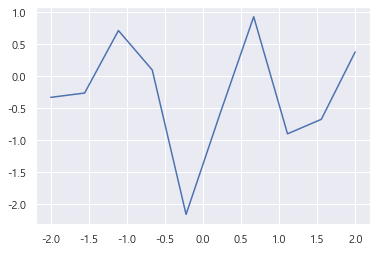

In [55]:
plt.plot(np.linspace(-2, 2, 10), y)

In [56]:
y.mean()

-0.28362489232047583

In [57]:
y.std()

0.8500342193040138

In [53]:
x = np.linspace(-8, 8, 1000)

In [59]:
sigma = 1

In [61]:
mu = 0

In [62]:
y2 = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x-mu)**2 / (2 * sigma**2))

In [63]:
y2

array([5.05227108e-15, 5.74217313e-15, 6.52460942e-15, 7.41176008e-15,
       8.41737711e-15, 9.55698301e-15, 1.08480940e-14, 1.23104709e-14,
       1.39664005e-14, 1.58410116e-14, 1.79626303e-14, 2.03631776e-14,
       2.30786161e-14, 2.61494511e-14, 2.96212913e-14, 3.35454789e-14,
       3.79797938e-14, 4.29892440e-14, 4.86469493e-14, 5.50351318e-14,
       6.22462237e-14, 7.03841071e-14, 7.95655007e-14, 8.99215102e-14,
       1.01599362e-13, 1.14764342e-13, 1.29601956e-13, 1.46320353e-13,
       1.65153021e-13, 1.86361802e-13, 2.10240257e-13, 2.37117417e-13,
       2.67361968e-13, 3.01386920e-13, 3.39654810e-13, 3.82683499e-13,
       4.31052633e-13, 4.85410834e-13, 5.46483717e-13, 6.15082803e-13,
       6.92115446e-13, 7.78595871e-13, 8.75657455e-13, 9.84566375e-13,
       1.10673679e-12, 1.24374771e-12, 1.39736171e-12, 1.56954576e-12,
       1.76249430e-12, 1.97865492e-12, 2.22075678e-12, 2.49184216e-12,
       2.79530153e-12, 3.13491227e-12, 3.51488175e-12, 3.93989497e-12,
      

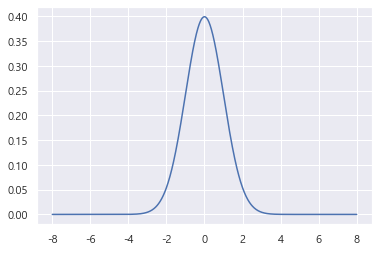

In [65]:
plt.plot(x, y2)

In [69]:
pdf = stats.norm.pdf(y2, x)

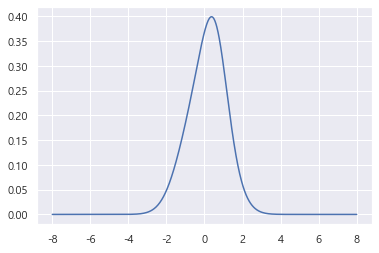

In [71]:
plt.plot(x, pdf)

In [76]:
fin_250 = [10000 * np.random.randn() for _ in range(250)]

In [82]:
arr_fin_250 = np.array(fin_250)
arr_fin_250

array([  8730.07111263,    393.01755043,  -9223.39865006,    160.39599416,
       -16768.72662533, -10708.57176796,  14908.40851432,  15269.87950052,
          669.81897887,   1317.41462878,   2577.99451121,  17410.98976168,
        10089.3720387 ,   9840.41603943,   4809.90669966,  -2023.18975535,
        -2183.7366257 ,  -4716.56055132,   2341.12088067,  14627.07810382,
         7965.87874671,  -3493.40422408, -10012.74706216,  -4383.71084172,
        -5800.26258515,    479.89204823,  -1960.75855298,   7270.07224125,
       -23465.5387206 ,   6495.94048854,   9950.93464342,  -8527.11970366,
       -14700.08338499,  -4769.1228639 ,   3726.63682867,   -960.80000141,
         5596.19112403,  12007.17414444,  17025.54373797,   5823.5939971 ,
        13014.22419995,   5500.73327143,   4359.3295559 ,   -330.0402736 ,
        17441.93853595,   3815.91272746,  -3656.01614432,  -1117.25255349,
         1928.0574869 ,  -1690.03790648,   2835.67065369,  10656.15261673,
         5900.40844967,  

In [83]:
arr_fin_250.mean()

964.5559319020081

In [84]:
arr_fin_250.std()

9947.169416673429

In [85]:
arr_fin_250.var()

98946179.40400322